In [1]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3


In [2]:
tc= create_taiga_client_v3()

In [3]:
crispr_dependencies = tc.get(name='internal-24q4-8c04', version=101, file='CRISPRGeneEffect')

In [4]:
crispr_dependencies

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,-0.145242,0.019477,0.056237,-0.173868,0.005131,0.218239,-0.068562,-0.058885,0.191578,0.002530,...,-0.132745,0.080368,0.159529,0.258031,0.179917,-0.249540,0.052480,0.080656,0.160498,-0.426900
ACH-000004,-0.039512,-0.073714,-0.085854,-0.075194,0.021538,-0.140434,0.247872,-0.046966,0.215978,0.131511,...,-0.264802,-0.403360,0.199695,0.105634,0.095723,0.076356,-0.311548,0.106594,0.271735,-0.054990
ACH-000005,-0.179671,0.041547,0.187036,0.088175,-0.127169,-0.259563,0.154824,-0.045603,-0.135695,0.018855,...,-0.331664,-0.393016,-0.083058,-0.047129,0.002738,-0.174817,-0.058520,-0.040518,0.066276,-0.090507
ACH-000007,-0.058821,-0.127777,0.084479,0.065821,0.039912,-0.016302,-0.023659,-0.156820,-0.160647,0.171016,...,-0.365998,-0.363134,-0.042620,0.264256,0.049146,-0.052702,-0.399776,0.020496,-0.283006,-0.369503
ACH-000009,-0.043372,-0.141960,0.078283,0.061353,0.118325,-0.100590,0.025024,-0.095865,0.053149,0.059934,...,-0.341299,-0.261603,-0.032972,0.257242,-0.068297,-0.075614,-0.509414,0.092275,-0.011776,-0.274946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003578,-0.171139,-0.058941,-0.093873,0.019887,-0.026497,-0.073211,0.080759,-0.127011,-0.075251,0.002337,...,-0.341456,-0.458900,-0.040988,0.109176,-0.171388,-0.063561,-0.139759,-0.053729,-0.146962,-0.368850
ACH-003580,0.055524,0.208115,-0.087154,0.078650,0.132832,-0.003156,0.118247,-0.231775,0.045564,0.280823,...,-0.333588,-0.660225,0.034779,0.273591,-0.186056,-0.208219,-0.308978,0.129455,-0.163789,-0.338718
ACH-003587,-0.017993,-0.372994,-0.082105,0.216732,-0.017278,0.009151,0.071652,-0.553196,-0.224519,0.309110,...,-0.414315,-0.630464,-0.144833,0.151849,-0.146543,0.029709,-0.387989,0.067026,-0.249321,-0.192970
ACH-003590,-0.087854,-0.008505,0.056008,0.146640,-0.112046,-0.052856,0.165373,-0.423358,0.010036,0.157737,...,-0.623025,-0.618526,-0.090796,0.138445,-0.068029,0.022866,-0.089312,0.025531,-0.182506,-0.271250


## Getting transcription factors list

In [5]:
tfs = pd.read_csv("data/tf_list.csv")

In [6]:
tfs.head()

,hugo_symbol
0,TFAP2A
1,TFAP2B
2,TFAP2C
3,TFAP2D
4,TFAP2E


In [7]:
tfs.shape

(1639, 1)

In [8]:
tfs_reviewed = pd.read_excel("data/TF_names.xlsx")

In [9]:
tfs_reviewed.head()

,Unnamed: 0,Original names,Unnamed: 2,new names
0,NaN,C11orf95,NaN,ZFTA
1,NaN,ZBED9,NaN,ZBED9
2,NaN,ARNTL,NaN,BMAL1
3,NaN,ARNTL2,NaN,BMAL2
4,NaN,AC023509.3,NaN,NaN


In [10]:
tfs_reviewed = tfs_reviewed[["Original names", "new names"]]

In [11]:
tfs_reviewed.shape

(15, 2)

In [12]:
tfs = tfs[~tfs["hugo_symbol"].isin(tfs_reviewed["Original names"].values)]

In [13]:
tfs["hugo_symbol"] = pd.concat([tfs["hugo_symbol"], tfs_reviewed["new names"]], ignore_index=True)

In [14]:
tfs


,hugo_symbol
0,TFAP2A
1,TFAP2B
2,TFAP2C
3,TFAP2D
4,TFAP2E
...,...
1634,ZNF705EP
1635,ZNF788P
1636,ZUP1
1637,CENPBD1P


## Filtering matrix

In [15]:
import re

In [16]:
crispr_dependencies.columns

Index(['A1BG (1)', 'A1CF (29974)', 'A2M (2)', 'A2ML1 (144568)',
       'A3GALT2 (127550)', 'A4GALT (53947)', 'A4GNT (51146)', 'AAAS (8086)',
       'AACS (65985)', 'AADAC (13)',
       ...
       'ZWILCH (55055)', 'ZWINT (11130)', 'ZXDA (7789)', 'ZXDB (158586)',
       'ZXDC (79364)', 'ZYG11A (440590)', 'ZYG11B (79699)', 'ZYX (7791)',
       'ZZEF1 (23140)', 'ZZZ3 (26009)'],
      dtype='object', length=17916)

In [17]:
crispr_dependencies.columns = [re.sub(r"\(\d+\)", "", c).strip() for c in crispr_dependencies.columns]

In [18]:
tfs_found = [tf for tf in tfs["hugo_symbol"] if tf in crispr_dependencies.columns]

In [19]:
len(tfs_found)

1543

In [20]:
crispr_dependencies = crispr_dependencies.loc[:, tfs_found]

In [21]:
crispr_dependencies.to_pickle("pydata/tfs_dependencies.pkl")

In [22]:
Model = tc.get(name='internal-24q4-8c04', version=101, file='Model')

In [23]:
Model

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,None,...,None,None,None,NIHOVCAR3_OVARY,None,Available in SRA,None,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,None,None,None,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,None,...,None,None,None,CACO2_LARGE_INTESTINE,None,Available in SRA,None,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,None,None,None,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,None,None,None,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,NaN,SIDM00593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,ACH-003659,PT-UFmFPI,SMS-KAN,SMSKAN,NBL,Peripheral Nervous System,Neuroblastoma,Neuroblastoma,NBL,None,...,None,None,None,None,None,None,None,NaN,None,NaN
2548,ACH-003660,PT-UFmFPI,SMS-KANR,SMSKANR,NBL,Peripheral Nervous System,Neuroblastoma,Neuroblastoma,NBL,None,...,None,None,None,None,None,None,None,NaN,None,NaN
2549,ACH-003665,PT-ZwaNYv,MBU-8,MBU8,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"Compared to the parent cell line, has a comple...",...,None,None,None,None,None,None,None,NaN,None,NaN
2550,ACH-003666,PT-ijqCP4,YCUB-4,YCUB4,BLL,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,BLL,cells express a MEF2D exon5/BCL9 exon 9 fusion,...,None,None,None,None,None,None,MEF2D,NaN,None,NaN


In [24]:
# merge crispr_dependencies with cell line information based on ModelID (index in crispr_dependencies)
crispr_dependencies = crispr_dependencies.merge(Model[['ModelID', 'CellLineName', "OncotreeLineage", "OncotreeSubtype"]], left_index = True, right_on = 'ModelID')

In [25]:
crispr_dependencies

,TFAP2A,TFAP2B,TFAP2C,TFAP2D,TFAP2E,ARID3A,ARID3B,ARID3C,ARID5A,ARID5B,...,BMAL1,BMAL2,ZNF875,CBLL2,ZUP1,TBXT,ModelID,CellLineName,OncotreeLineage,OncotreeSubtype
0,0.032275,-0.052657,-0.099978,-0.040024,0.060890,0.102625,-0.121782,0.027268,-0.243864,-0.096952,...,-0.645930,0.140806,-0.892911,0.215270,-0.014496,0.169385,ACH-000001,NIH:OVCAR-3,Ovary/Fallopian Tube,High-Grade Serous Ovarian Cancer
3,0.145169,0.066916,-0.074218,-0.125423,0.240744,-0.105335,-0.734358,-0.027738,-0.136107,0.008301,...,-0.205806,-0.090015,0.168027,0.280951,-0.182743,0.082328,ACH-000004,HEL,Myeloid,Acute Myeloid Leukemia
4,0.171513,-0.361703,-0.017947,-0.103094,0.315080,0.069369,-0.026263,-0.022071,0.006219,0.200501,...,-0.207084,-0.134599,0.374316,-0.018200,-0.283811,0.058674,ACH-000005,HEL 92.1.7,Myeloid,Acute Myeloid Leukemia
6,-0.073170,0.200249,-0.292673,-0.238197,-0.059635,0.041934,-0.329979,-0.080568,-0.067746,-0.198359,...,0.140064,-0.069550,0.180594,0.104287,-0.311871,-0.006005,ACH-000007,LS513,Bowel,Colon Adenocarcinoma
8,0.224490,-0.001485,-0.172446,0.018604,0.034670,-0.316335,-0.053869,0.059077,-0.058235,-0.495861,...,-0.111904,0.027901,0.098494,0.060150,0.014514,0.136429,ACH-000009,C2BBe1,Bowel,Colon Adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,-0.070363,-0.033106,-0.243238,-0.370448,-0.108596,0.023995,-0.181551,-0.213355,-0.284968,-0.052868,...,-0.052162,-0.106350,0.018423,0.079413,0.005381,0.105370,ACH-003578,ES8_SLFN11-KO,Bone,Ewing Sarcoma
2516,-0.081792,-0.181257,-0.381345,-0.202155,0.109083,-0.004828,0.018773,-0.112690,-0.071700,-0.386106,...,-0.119621,-0.077457,-0.205756,-0.021425,0.016575,0.077086,ACH-003580,SJ-DIPGX7,CNS/Brain,Diffuse Intrinsic Pontine Glioma
2518,-0.128495,-0.347200,-0.229025,-0.420290,0.106401,-0.087998,0.062317,-0.158840,0.009397,-0.086930,...,-0.095881,0.210714,-0.104913,-0.141233,0.058059,0.013758,ACH-003587,531MII,Bone,Osteosarcoma
2520,0.029615,-0.090314,-0.087541,-0.343993,0.073768,-0.087375,-0.049801,-0.047360,0.009253,-0.328680,...,-0.043185,-0.007903,-0.250206,-0.080775,0.102683,0.069626,ACH-003590,YCUB-2,Lymphoid,B-Lymphoblastic Leukemia/Lymphoma


In [26]:
# reset index as Model ID
crispr_dependencies_2 = crispr_dependencies.set_index(crispr_dependencies.columns[-4])

In [27]:
crispr_dependencies_2
crispr_dependencies_2.to_csv("pydata/crispr_dependencies_2.csv")

In [28]:
crispr_dependencies_3 = crispr_dependencies_2.iloc[:, :-3]

In [29]:

# sub dataframe from crispr_dependencies_2, without columns " cellline name, oncotreelineage, oncotreesubtype"
crispr_dependencies_3.to_csv("pydata/crispr_dependencies_3.csv")

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
gene_expr= pd.read_pickle("pydata/tpmlog2p1.pkl")
gene_expr

,TFE3,MMADHC,PABPC1L,RELL2,GPT,GUSB,H4-16,DDB2,RPS4X,HINFP,...,OR2A42,HOXB7,NSA2,UGT2B11,ZNF747,NAA60,MYH4,MTAP,C14orf93,NR3C2
ACH-000873,3.506205,3.584484,4.572699,2.137186,0.525915,5.041027,1.179124,4.345084,10.069657,2.869262,...,0.032995,3.748717,5.155622,-0.009160,1.952132,4.141739,-0.000116,3.782797,2.193078,0.245980
ACH-000860,4.089100,6.886964,4.430887,2.528341,0.117545,5.589460,1.053103,4.127051,10.209273,4.024218,...,0.023290,-0.160952,6.753527,-0.009160,1.357422,4.268943,-0.000116,4.690644,3.372848,0.417233
ACH-000439,3.165189,5.836121,1.049685,3.957850,0.308481,6.517316,0.317849,4.238008,11.637030,4.678546,...,-0.016486,-0.189162,6.883302,2.206492,3.058301,4.573945,-0.000116,4.000853,2.199302,0.052468
ACH-000318,3.603682,5.844594,4.082083,2.102328,0.390166,5.082609,2.210189,4.881627,9.159418,2.489161,...,-0.016486,2.922211,5.594495,-0.009160,2.271837,3.791668,-0.000116,0.273937,3.222723,0.321795
ACH-001142,5.995286,7.071005,3.995839,2.349655,-0.056134,4.511908,2.253969,3.913061,10.173268,3.719160,...,0.042608,3.458342,7.431706,-0.009160,2.232625,4.852927,-0.000116,4.257783,2.358115,0.570824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003180,5.165957,7.735123,1.888620,1.447676,0.305600,6.416978,0.369623,4.781201,9.478081,2.966378,...,0.097491,4.816006,6.277112,0.002097,2.609723,5.097519,0.023647,4.856428,2.661060,-0.016156
ACH-001979,4.985783,7.665280,3.026326,3.032295,0.305600,6.804347,0.735648,5.629513,11.373898,2.688530,...,0.018964,4.843341,7.279101,0.002097,2.272606,5.139305,-0.000713,4.964760,2.754223,0.492046
ACH-003274,3.463985,6.899029,2.126371,3.764047,0.340686,5.714290,0.450048,3.300497,10.796507,3.748022,...,0.018964,0.191719,6.945938,0.002097,2.520798,5.038073,0.011527,4.214451,3.669716,0.051750
ACH-002748,4.142447,6.848186,1.440711,3.091984,2.097855,7.121441,1.067238,2.825501,9.164170,3.436956,...,0.018964,2.835515,5.897340,0.002097,1.828925,5.208657,-0.000713,2.871649,2.019966,2.086770


In [32]:
gene_expr.columns

Index(['TFE3', 'MMADHC', 'PABPC1L', 'RELL2', 'GPT', 'GUSB', 'H4-16', 'DDB2',
       'RPS4X', 'HINFP',
       ...
       'OR2A42', 'HOXB7', 'NSA2', 'UGT2B11', 'ZNF747', 'NAA60', 'MYH4', 'MTAP',
       'C14orf93', 'NR3C2'],
      dtype='object', length=19139)

In [33]:
E3_ligases = pd.read_excel("data/E3_ligase_list.xlsx", skiprows=1)

In [34]:
E3_ligases

,Symbol,HGNC,uniprot_ids,Confidence Score,Ge.et.al,UbiHub,UbiBrowser
0,AHCTF1,HGNC:24618,Q8WYP5,1,Yes,No,No
1,ODAD2,HGNC:25583,Q5T2S8,1,Yes,No,No
2,BAZ1A,HGNC:960,Q9NRL2,1,Yes,No,No
3,BAZ1B,HGNC:961,Q9UIG0,1,Yes,No,No
4,BPTF,HGNC:3581,Q12830,1,Yes,No,No
...,...,...,...,...,...,...,...
1070,PTPA,HGNC:9308,Q15257,1,No,No,Yes
1071,RSAD2,HGNC:30908,Q8WXG1,1,No,No,Yes
1072,TNFAIP3,HGNC:11896,P21580,1,No,No,Yes
1073,TOM1,HGNC:11982,O60784,1,No,No,Yes


In [35]:
E3_list = E3_ligases[["Symbol"]]

In [36]:
E3_found = [E3 for E3 in E3_ligases["Symbol"] if E3 in gene_expr.columns]

In [37]:
len(E3_found)

1070

In [38]:
E3_expr = gene_expr[E3_found]
#E3_expr.set_index(E3_expr.columns[0], inplace=True)
E3_expr.index.name = "ModelID"
E3_expr.to_csv("pydata/E3_expr.csv")

In [39]:
E3_expr

,AHCTF1,BAZ1A,BAZ1B,BPTF,C10orf90,CHD3,CHD4,CHD6,DIDO1,DPF1,...,FAF2,NAT10,PRC1,MALT1,UCHL1,PTPA,RSAD2,TNFAIP3,TOM1,UBE2G1
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000873,2.879136,3.041012,3.680269,4.037185,0.030007,5.356616,6.522379,2.542923,4.270947,1.984904,...,4.808157,4.851030,5.367397,2.176448,8.371465,5.086677,0.084441,1.425680,2.279007,4.087440
ACH-000860,4.504585,5.624291,5.240666,5.471781,0.030007,5.792237,7.605641,3.336071,4.525571,2.080899,...,4.900607,4.758510,7.224054,2.784538,5.559487,6.944998,2.017100,1.074665,3.255804,4.088215
ACH-000439,3.268524,4.012726,4.122294,3.902031,0.107769,4.921870,7.271360,3.289881,4.573126,0.133958,...,3.848391,5.907751,4.733026,1.591721,0.348255,4.754216,3.073734,3.008230,3.470970,3.282277
ACH-000318,4.265861,5.848107,4.461873,3.990151,0.045866,4.885464,7.595682,2.646811,4.156001,1.872706,...,4.462992,4.589843,7.080056,2.214626,4.275445,5.773284,0.098656,4.148765,3.834791,3.758899
ACH-001142,3.654867,4.359206,5.082618,4.561324,1.438557,5.795731,6.787422,2.630329,3.859137,1.894607,...,5.198623,4.568775,5.379175,3.454078,9.110389,7.195191,5.870046,4.041461,5.589232,4.674514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003180,4.823732,4.178747,5.567718,3.569895,0.164433,5.645091,6.396430,3.110030,3.869933,1.508288,...,4.825289,3.770689,6.115676,3.667448,9.568652,6.827513,0.020743,4.115756,4.945991,4.848875
ACH-001979,4.278221,4.015886,5.774248,4.471009,4.655599,5.282704,7.013427,3.147898,3.749013,0.789340,...,5.366747,4.371172,4.701476,3.749009,0.281922,9.273929,0.074430,0.903717,5.630842,4.516191
ACH-003274,4.805169,4.798377,6.126364,4.746450,1.218363,4.984711,7.818060,4.432611,4.663870,5.086461,...,4.697196,4.520429,7.685519,3.245391,9.021785,6.426851,0.151311,1.633103,4.028875,4.926784


In [40]:
E3_expr_filtered = E3_expr[E3_expr.index.isin(crispr_dependencies_3.index)]


In [41]:
crispr_dependencies_3_filtered = crispr_dependencies_3[crispr_dependencies_3.index.isin(E3_expr_filtered.index)]

In [42]:
E3_expr_filtered

,AHCTF1,BAZ1A,BAZ1B,BPTF,C10orf90,CHD3,CHD4,CHD6,DIDO1,DPF1,...,FAF2,NAT10,PRC1,MALT1,UCHL1,PTPA,RSAD2,TNFAIP3,TOM1,UBE2G1
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000873,2.879136,3.041012,3.680269,4.037185,0.030007,5.356616,6.522379,2.542923,4.270947,1.984904,...,4.808157,4.851030,5.367397,2.176448,8.371465,5.086677,0.084441,1.425680,2.279007,4.087440
ACH-000860,4.504585,5.624291,5.240666,5.471781,0.030007,5.792237,7.605641,3.336071,4.525571,2.080899,...,4.900607,4.758510,7.224054,2.784538,5.559487,6.944998,2.017100,1.074665,3.255804,4.088215
ACH-000318,4.265861,5.848107,4.461873,3.990151,0.045866,4.885464,7.595682,2.646811,4.156001,1.872706,...,4.462992,4.589843,7.080056,2.214626,4.275445,5.773284,0.098656,4.148765,3.834791,3.758899
ACH-000544,3.159460,3.760636,4.256027,3.010144,0.077118,4.281717,5.957068,1.951811,3.112774,2.191360,...,3.568363,3.983380,6.230785,1.808476,6.195926,5.880425,2.283392,1.626383,1.921344,3.758899
ACH-000695,3.399218,4.084443,6.405885,4.441290,0.030007,5.584095,6.594146,4.969466,4.949920,4.649193,...,5.302510,4.559864,7.895208,2.685931,10.672562,6.467633,2.247199,1.025350,4.152570,3.954293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003369,3.698571,4.547500,5.412377,4.596669,0.152700,4.641971,6.946474,3.405346,4.311522,0.558505,...,5.210923,4.201021,6.329907,3.130945,1.364947,6.658655,1.626893,3.213677,4.576424,3.908710
ACH-001843,4.052603,4.579034,5.499186,4.584901,3.780571,5.825668,6.717111,2.522739,3.562486,0.497586,...,4.931658,4.165988,5.098594,3.872367,0.431401,6.357175,0.783671,3.071408,5.179466,5.057596
ACH-001164,3.430555,3.417871,4.492366,4.730961,0.016381,5.990543,5.954947,2.172386,4.630782,2.327620,...,4.343795,4.527913,6.265995,2.219064,5.237962,8.110693,0.259296,1.388330,3.850580,3.965049


In [43]:
E3_expr_filtered = E3_expr_filtered.sort_index()

In [44]:
E3_expr_filtered.to_csv("pydata/E3_expr_filtered.csv")

In [45]:
crispr_dependencies_3_filtered = crispr_dependencies_3_filtered.sort_index()

In [46]:
crispr_dependencies_3_filtered.to_csv("pydata/crispr_dependencies_3_filtered.csv")

In [47]:
crispr_dependencies_3_filtered

,TFAP2A,TFAP2B,TFAP2C,TFAP2D,TFAP2E,ARID3A,ARID3B,ARID3C,ARID5A,ARID5B,...,THAP6,THAP7,THAP8,THAP9,BMAL1,BMAL2,ZNF875,CBLL2,ZUP1,TBXT
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,0.032275,-0.052657,-0.099978,-0.040024,0.060890,0.102625,-0.121782,0.027268,-0.243864,-0.096952,...,-0.087478,-0.317241,-0.052855,-0.065466,-0.645930,0.140806,-0.892911,0.215270,-0.014496,0.169385
ACH-000004,0.145169,0.066916,-0.074218,-0.125423,0.240744,-0.105335,-0.734358,-0.027738,-0.136107,0.008301,...,-0.462663,-0.194145,0.130992,-0.251477,-0.205806,-0.090015,0.168027,0.280951,-0.182743,0.082328
ACH-000005,0.171513,-0.361703,-0.017947,-0.103094,0.315080,0.069369,-0.026263,-0.022071,0.006219,0.200501,...,-0.094047,-0.180209,-0.163869,-0.026951,-0.207084,-0.134599,0.374316,-0.018200,-0.283811,0.058674
ACH-000007,-0.073170,0.200249,-0.292673,-0.238197,-0.059635,0.041934,-0.329979,-0.080568,-0.067746,-0.198359,...,-0.071877,-0.105574,0.144103,-0.023396,0.140064,-0.069550,0.180594,0.104287,-0.311871,-0.006005
ACH-000009,0.224490,-0.001485,-0.172446,0.018604,0.034670,-0.316335,-0.053869,0.059077,-0.058235,-0.495861,...,-0.059427,-0.024232,-0.025614,-0.115766,-0.111904,0.027901,0.098494,0.060150,0.014514,0.136429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003578,-0.070363,-0.033106,-0.243238,-0.370448,-0.108596,0.023995,-0.181551,-0.213355,-0.284968,-0.052868,...,0.040754,-0.215718,0.054442,-0.043687,-0.052162,-0.106350,0.018423,0.079413,0.005381,0.105370
ACH-003580,-0.081792,-0.181257,-0.381345,-0.202155,0.109083,-0.004828,0.018773,-0.112690,-0.071700,-0.386106,...,-0.040535,-0.178553,0.195923,0.063442,-0.119621,-0.077457,-0.205756,-0.021425,0.016575,0.077086
ACH-003587,-0.128495,-0.347200,-0.229025,-0.420290,0.106401,-0.087998,0.062317,-0.158840,0.009397,-0.086930,...,0.022615,0.289244,0.065706,0.043732,-0.095881,0.210714,-0.104913,-0.141233,0.058059,0.013758


In [48]:
combined_df = pd.concat([E3_expr_filtered, crispr_dependencies_3_filtered], axis=1)

In [49]:
combined_df

,AHCTF1,BAZ1A,BAZ1B,BPTF,C10orf90,CHD3,CHD4,CHD6,DIDO1,DPF1,...,THAP6,THAP7,THAP8,THAP9,BMAL1,BMAL2,ZNF875,CBLL2,ZUP1,TBXT
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,4.547148,4.984740,4.315357,5.687711,0.030007,5.761644,7.023738,3.721818,5.576351,3.194467,...,-0.087478,-0.317241,-0.052855,-0.065466,-0.645930,0.140806,-0.892911,0.215270,-0.014496,0.169385
ACH-000004,4.667143,4.896403,4.804796,4.640980,0.061569,5.449595,7.864986,2.523042,3.707532,1.090447,...,-0.462663,-0.194145,0.130992,-0.251477,-0.205806,-0.090015,0.168027,0.280951,-0.182743,0.082328
ACH-000005,5.491789,5.675128,5.422608,5.213716,0.030007,5.277307,8.365089,3.006275,3.860698,0.863253,...,-0.094047,-0.180209,-0.163869,-0.026951,-0.207084,-0.134599,0.374316,-0.018200,-0.283811,0.058674
ACH-000007,3.957771,4.169053,4.956241,3.856503,0.030007,3.466699,6.346551,1.902375,3.550977,-0.271199,...,-0.071877,-0.105574,0.144103,-0.023396,0.140064,-0.069550,0.180594,0.104287,-0.311871,-0.006005
ACH-000009,4.872840,4.308199,5.355778,4.987164,0.045866,2.690080,7.156598,3.769422,5.625186,1.277478,...,-0.059427,-0.024232,-0.025614,-0.115766,-0.111904,0.027901,0.098494,0.060150,0.014514,0.136429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003578,4.045178,6.206708,6.863578,5.045391,-0.023330,6.632156,7.933284,3.536418,4.316801,2.472526,...,0.040754,-0.215718,0.054442,-0.043687,-0.052162,-0.106350,0.018423,0.079413,0.005381,0.105370
ACH-003580,2.770540,3.533372,4.080707,4.218288,-0.023330,4.545071,6.807954,5.713653,3.701618,2.890557,...,-0.040535,-0.178553,0.195923,0.063442,-0.119621,-0.077457,-0.205756,-0.021425,0.016575,0.077086
ACH-003587,3.658421,3.906171,6.038966,3.667450,0.287156,6.812553,7.169666,3.510626,4.652930,1.989028,...,0.022615,0.289244,0.065706,0.043732,-0.095881,0.210714,-0.104913,-0.141233,0.058059,0.013758


In [50]:
correlation_matrix = combined_df.corr(method='pearson')

In [51]:
correlation_matrix

,AHCTF1,BAZ1A,BAZ1B,BPTF,C10orf90,CHD3,CHD4,CHD6,DIDO1,DPF1,...,THAP6,THAP7,THAP8,THAP9,BMAL1,BMAL2,ZNF875,CBLL2,ZUP1,TBXT
AHCTF1,1.000000,0.417412,0.537538,0.484401,0.011849,0.275800,0.380437,0.350494,0.330640,0.270522,...,0.005987,-0.007329,-0.055919,0.001769,0.068054,0.035113,-0.012012,-0.014449,0.022531,0.005196
BAZ1A,0.417412,1.000000,0.312129,0.392854,-0.165027,0.373335,0.281409,0.233870,0.229937,0.171365,...,0.015671,0.001672,-0.049675,-0.074264,0.000100,0.013557,-0.003961,-0.080504,0.033909,0.052037
BAZ1B,0.537538,0.312129,1.000000,0.541325,0.122938,0.320891,0.498344,0.426757,0.385722,0.448374,...,0.067744,0.023036,-0.076270,0.032390,0.062404,-0.015383,-0.026875,-0.075127,0.066329,0.055064
BPTF,0.484401,0.392854,0.541325,1.000000,-0.022740,0.413297,0.554527,0.525523,0.470068,0.355447,...,0.022136,0.004735,-0.051876,-0.037642,0.065766,0.027258,-0.011911,-0.062804,0.053275,0.099442
C10orf90,0.011849,-0.165027,0.122938,-0.022740,1.000000,-0.059036,0.103627,0.123533,-0.016975,0.150921,...,0.039443,0.034251,0.006332,0.069889,0.031841,0.028796,0.032018,-0.019492,0.009181,-0.052215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMAL2,0.035113,0.013557,-0.015383,0.027258,0.028796,-0.009077,0.032797,0.014537,-0.013847,0.016012,...,0.114107,0.024554,0.036525,0.060749,-0.013488,1.000000,0.073546,0.002095,-0.005587,-0.014761
ZNF875,-0.012012,-0.003961,-0.026875,-0.011911,0.032018,-0.043799,-0.001638,-0.035473,-0.020761,-0.080826,...,0.091522,-0.020962,-0.034383,-0.040581,-0.051411,0.073546,1.000000,-0.038024,-0.065198,-0.049476
CBLL2,-0.014449,-0.080504,-0.075127,-0.062804,-0.019492,-0.118622,-0.057400,-0.121317,-0.059020,-0.044796,...,-0.110328,-0.063903,0.032877,0.037296,0.069658,0.002095,-0.038024,1.000000,-0.085362,-0.010317
ZUP1,0.022531,0.033909,0.066329,0.053275,0.009181,-0.006077,0.021103,0.043992,0.058423,0.002467,...,0.052847,0.021908,-0.060023,-0.030291,-0.002790,-0.005587,-0.065198,-0.085362,1.000000,-0.028893


In [52]:
correlation_matrix_sub = correlation_matrix.iloc[1070:, 0:1070]
correlation_matrix_sub

,AHCTF1,BAZ1A,BAZ1B,BPTF,C10orf90,CHD3,CHD4,CHD6,DIDO1,DPF1,...,FAF2,NAT10,PRC1,MALT1,UCHL1,PTPA,RSAD2,TNFAIP3,TOM1,UBE2G1
TFAP2A,0.049363,0.111503,0.051619,0.046619,-0.312506,0.052279,0.020220,-0.033677,0.022742,0.070406,...,0.031069,0.080231,0.013393,0.077714,0.145415,-0.056336,0.052254,-0.017903,-0.144274,0.077154
TFAP2B,-0.018953,-0.023960,-0.051125,-0.073442,-0.000117,-0.043259,-0.068313,-0.108024,-0.035296,-0.152643,...,-0.019471,0.029657,-0.041449,0.042872,-0.102783,-0.015857,0.021874,0.100831,-0.010524,-0.024147
TFAP2C,-0.030694,-0.018233,-0.013818,-0.058139,-0.070901,-0.027390,-0.055016,-0.045487,-0.059885,0.054653,...,0.020463,0.033786,-0.011983,0.054395,0.083240,-0.091145,0.062023,0.059097,-0.024499,-0.019264
TFAP2D,0.010828,0.021095,0.003762,-0.026755,0.059700,0.007711,-0.044541,-0.046089,-0.040853,-0.037314,...,-0.010969,-0.016166,-0.020637,0.001665,-0.014037,0.007135,0.049846,0.115976,0.007797,-0.035622
TFAP2E,-0.043690,-0.007611,-0.058099,-0.088950,0.018412,-0.108779,-0.023498,-0.058385,-0.050649,-0.060784,...,-0.046310,-0.030304,-0.037807,-0.023034,-0.034928,-0.019361,-0.030594,0.040629,-0.020936,-0.048118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMAL2,0.035113,0.013557,-0.015383,0.027258,0.028796,-0.009077,0.032797,0.014537,-0.013847,0.016012,...,-0.030550,0.002108,0.001943,-0.040087,-0.021893,-0.058742,-0.023258,-0.013542,-0.034785,-0.001091
ZNF875,-0.012012,-0.003961,-0.026875,-0.011911,0.032018,-0.043799,-0.001638,-0.035473,-0.020761,-0.080826,...,-0.051082,-0.000917,0.001335,-0.057459,-0.085929,-0.016397,-0.004958,0.013731,-0.003835,-0.061999
CBLL2,-0.014449,-0.080504,-0.075127,-0.062804,-0.019492,-0.118622,-0.057400,-0.121317,-0.059020,-0.044796,...,-0.010945,-0.006089,-0.048139,-0.051234,-0.050639,0.018553,-0.007337,-0.021767,-0.039418,-0.058975
ZUP1,0.022531,0.033909,0.066329,0.053275,0.009181,-0.006077,0.021103,0.043992,0.058423,0.002467,...,-0.025090,0.034308,0.013956,0.016527,-0.061399,-0.038588,-0.014031,0.061296,-0.020611,-0.007545


In [53]:
correlation_matrix_sub.to_csv("Correlation_global.csv")

In [54]:
import seaborn as sns

<Axes: >

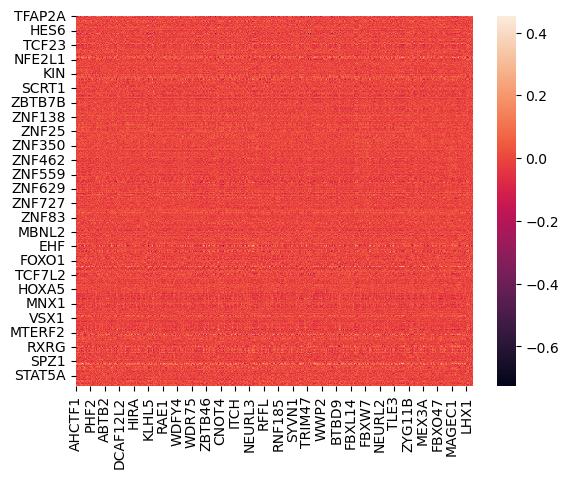

In [55]:
sns.heatmap(correlation_matrix_sub)